In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df = pd.read_csv("survey.csv")  
df.drop(["Timestamp","comments",'Country', 'state'],axis= 1, inplace = True)


In [9]:
df['Gender'] = df['Gender'].str.strip().str.lower()
gender_map = {
    'male': 'Male', 'm': 'Male', 'man': 'Male', 'cis male': 'Male',
    'female': 'Female', 'f': 'Female', 'woman': 'Female', 'cis female': 'Female',
    'trans-female': 'Other', 'trans woman': 'Other', 'trans female': 'Other',
    'trans male': 'Other', 'trans man': 'Other',
    'non-binary': 'Other', 'genderqueer': 'Other', 'androgynous': 'Other',
    'agender': 'Other', 'fluid': 'Other'
}

df['Gender'] = df['Gender'].map(gender_map).fillna('Other')

df['self_employed'] = df['self_employed'].fillna('No')
df['work_interfere'] = df['work_interfere'].fillna("Don't know")
df = df[(df['Age'] >= 18) & (df['Age'] <= 70)]


c:\Users\mohit_qn2dnt9\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


The silhouette score after applying PCA is: 0.06530528723097534


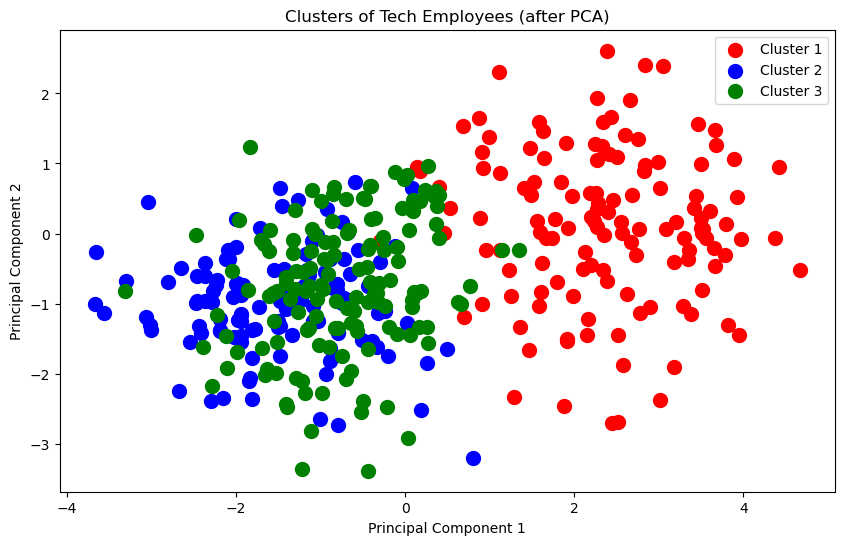

In [10]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

pca = PCA(n_components=0.95)
pca_df = pca.fit_transform(scaled_df)



kmeans_pca = KMeans(n_clusters=9, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_pca = kmeans_pca.fit_predict(pca_df)


# Calculate the silhouette score
silhouette_pca = silhouette_score(pca_df, clusters_pca)
print(f'The silhouette score after applying PCA is: {silhouette_pca}')


# Visualize the clusters using the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_df[clusters_pca == 0, 0], pca_df[clusters_pca == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(pca_df[clusters_pca == 1, 0], pca_df[clusters_pca == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(pca_df[clusters_pca == 2, 0], pca_df[clusters_pca == 2, 1], s=100, c='green', label='Cluster 3')
plt.title('Clusters of Tech Employees (after PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.savefig('kmeans_pca_clusters.png')

In [11]:
import pickle

In [ ]:
with open("clustering.pkl",'wb') as f:
    pickle.dump(silhouette_pca ,f)